In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

In [38]:
gdf=pd.read_csv('Glass_Identification.csv')
gdf

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [39]:
gdf.head()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [40]:
gdf.tail()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [41]:
gdf.sample()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
143,144,1.51709,13.0,3.47,1.79,72.72,0.66,8.18,0.0,0.0,2


<AxesSubplot:xlabel='Type', ylabel='count'>

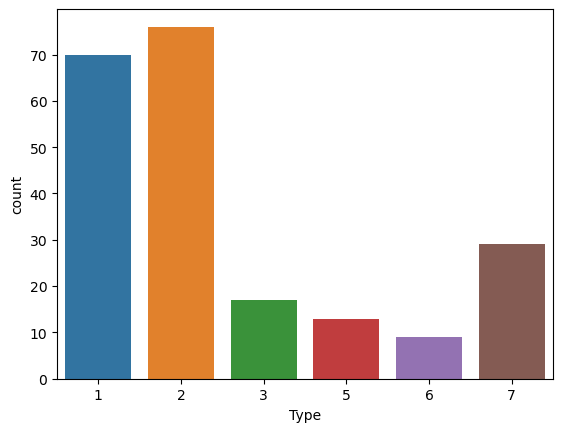

In [6]:
sns.countplot(gdf['Type'])

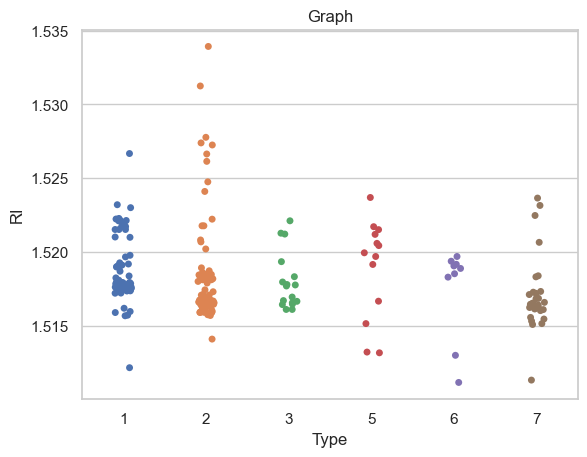

In [10]:
sns.set(style="whitegrid")
ax=sns.stripplot(x='Type',y='RI',data=gdf)
plt.title('Graph')
plt.show()

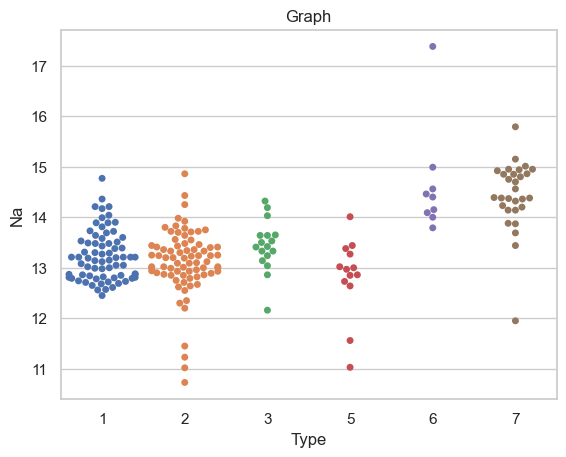

In [14]:
ax=sns.swarmplot(x='Type',y='Na',data=gdf)
plt.title('Graph')
plt.show()

In [16]:
gdf['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

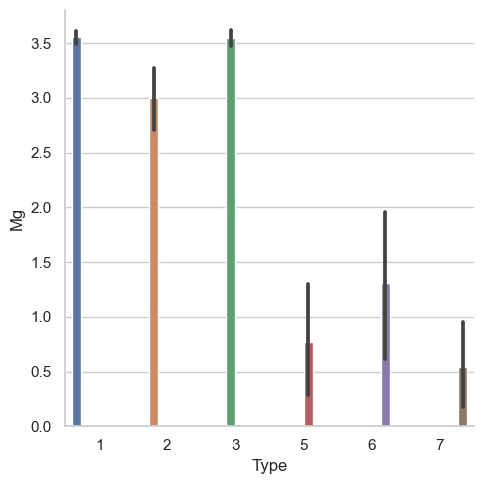

In [19]:
g=sns.catplot(x="Type",y="Mg",hue="Type",data=gdf,kind="bar")
plt.show()

<AxesSubplot:xlabel='AI'>

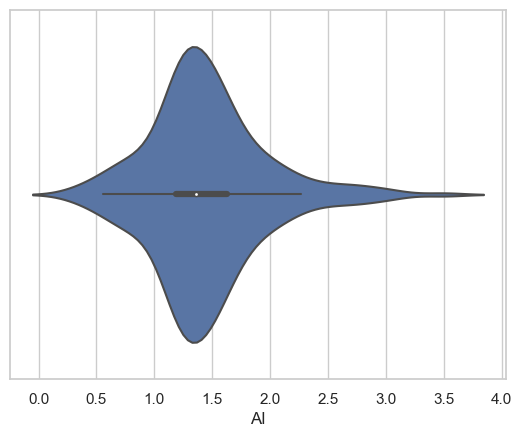

In [20]:
sns.violinplot(x="AI",data=gdf)

<AxesSubplot:xlabel='Si', ylabel='Count'>

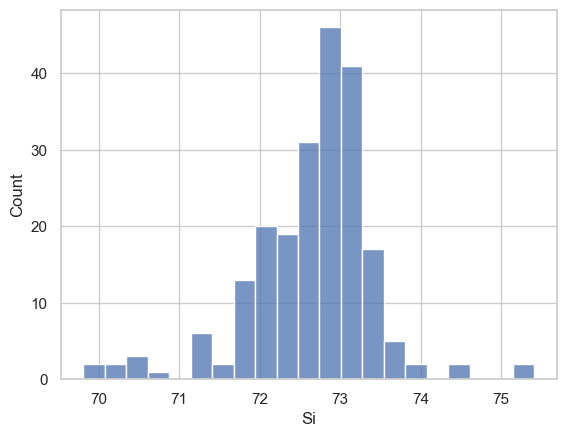

In [21]:
sns.histplot(data=gdf,x='Si')

<AxesSubplot:xlabel='K', ylabel='Density'>

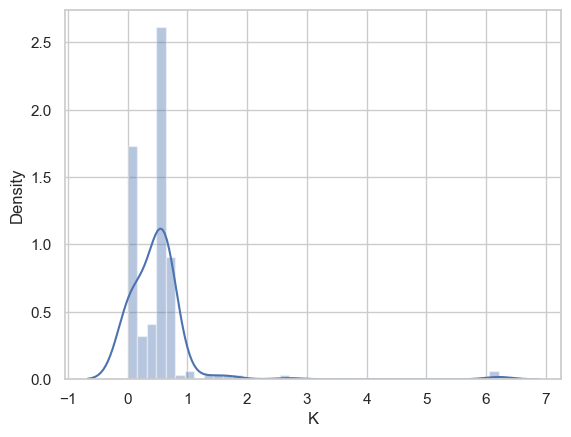

In [22]:
sns.distplot(gdf["K"])

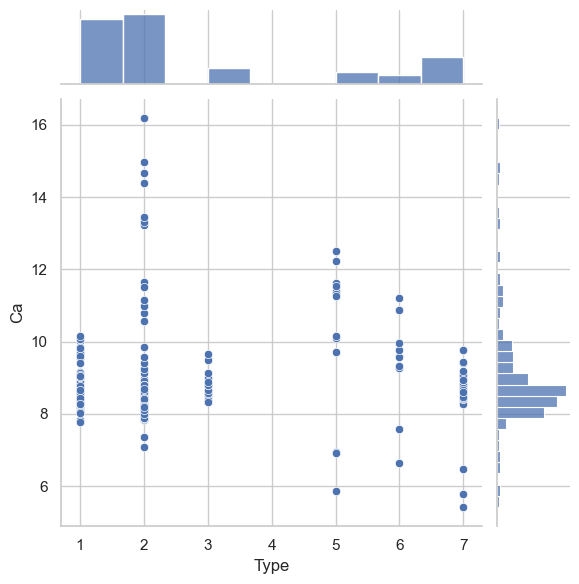

In [23]:
sns.jointplot(data=gdf,x='Type',y='Ca')

<AxesSubplot:xlabel='Type', ylabel='Ba'>

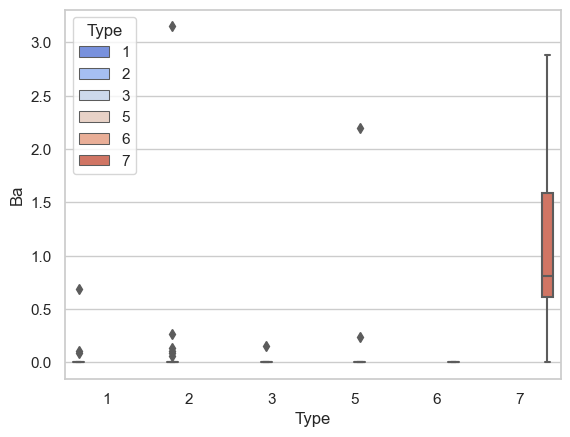

In [24]:
sns.boxplot(x="Type",y="Ba",hue="Type",data=gdf,palette="coolwarm")

<AxesSubplot:xlabel='Type', ylabel='Fe'>

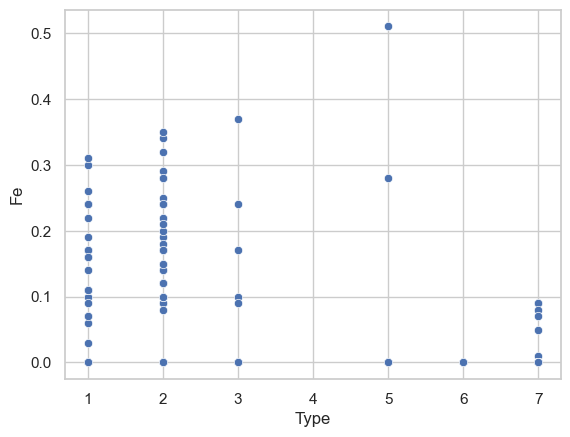

In [26]:
sns.scatterplot(data=gdf,x='Type',y='Fe')

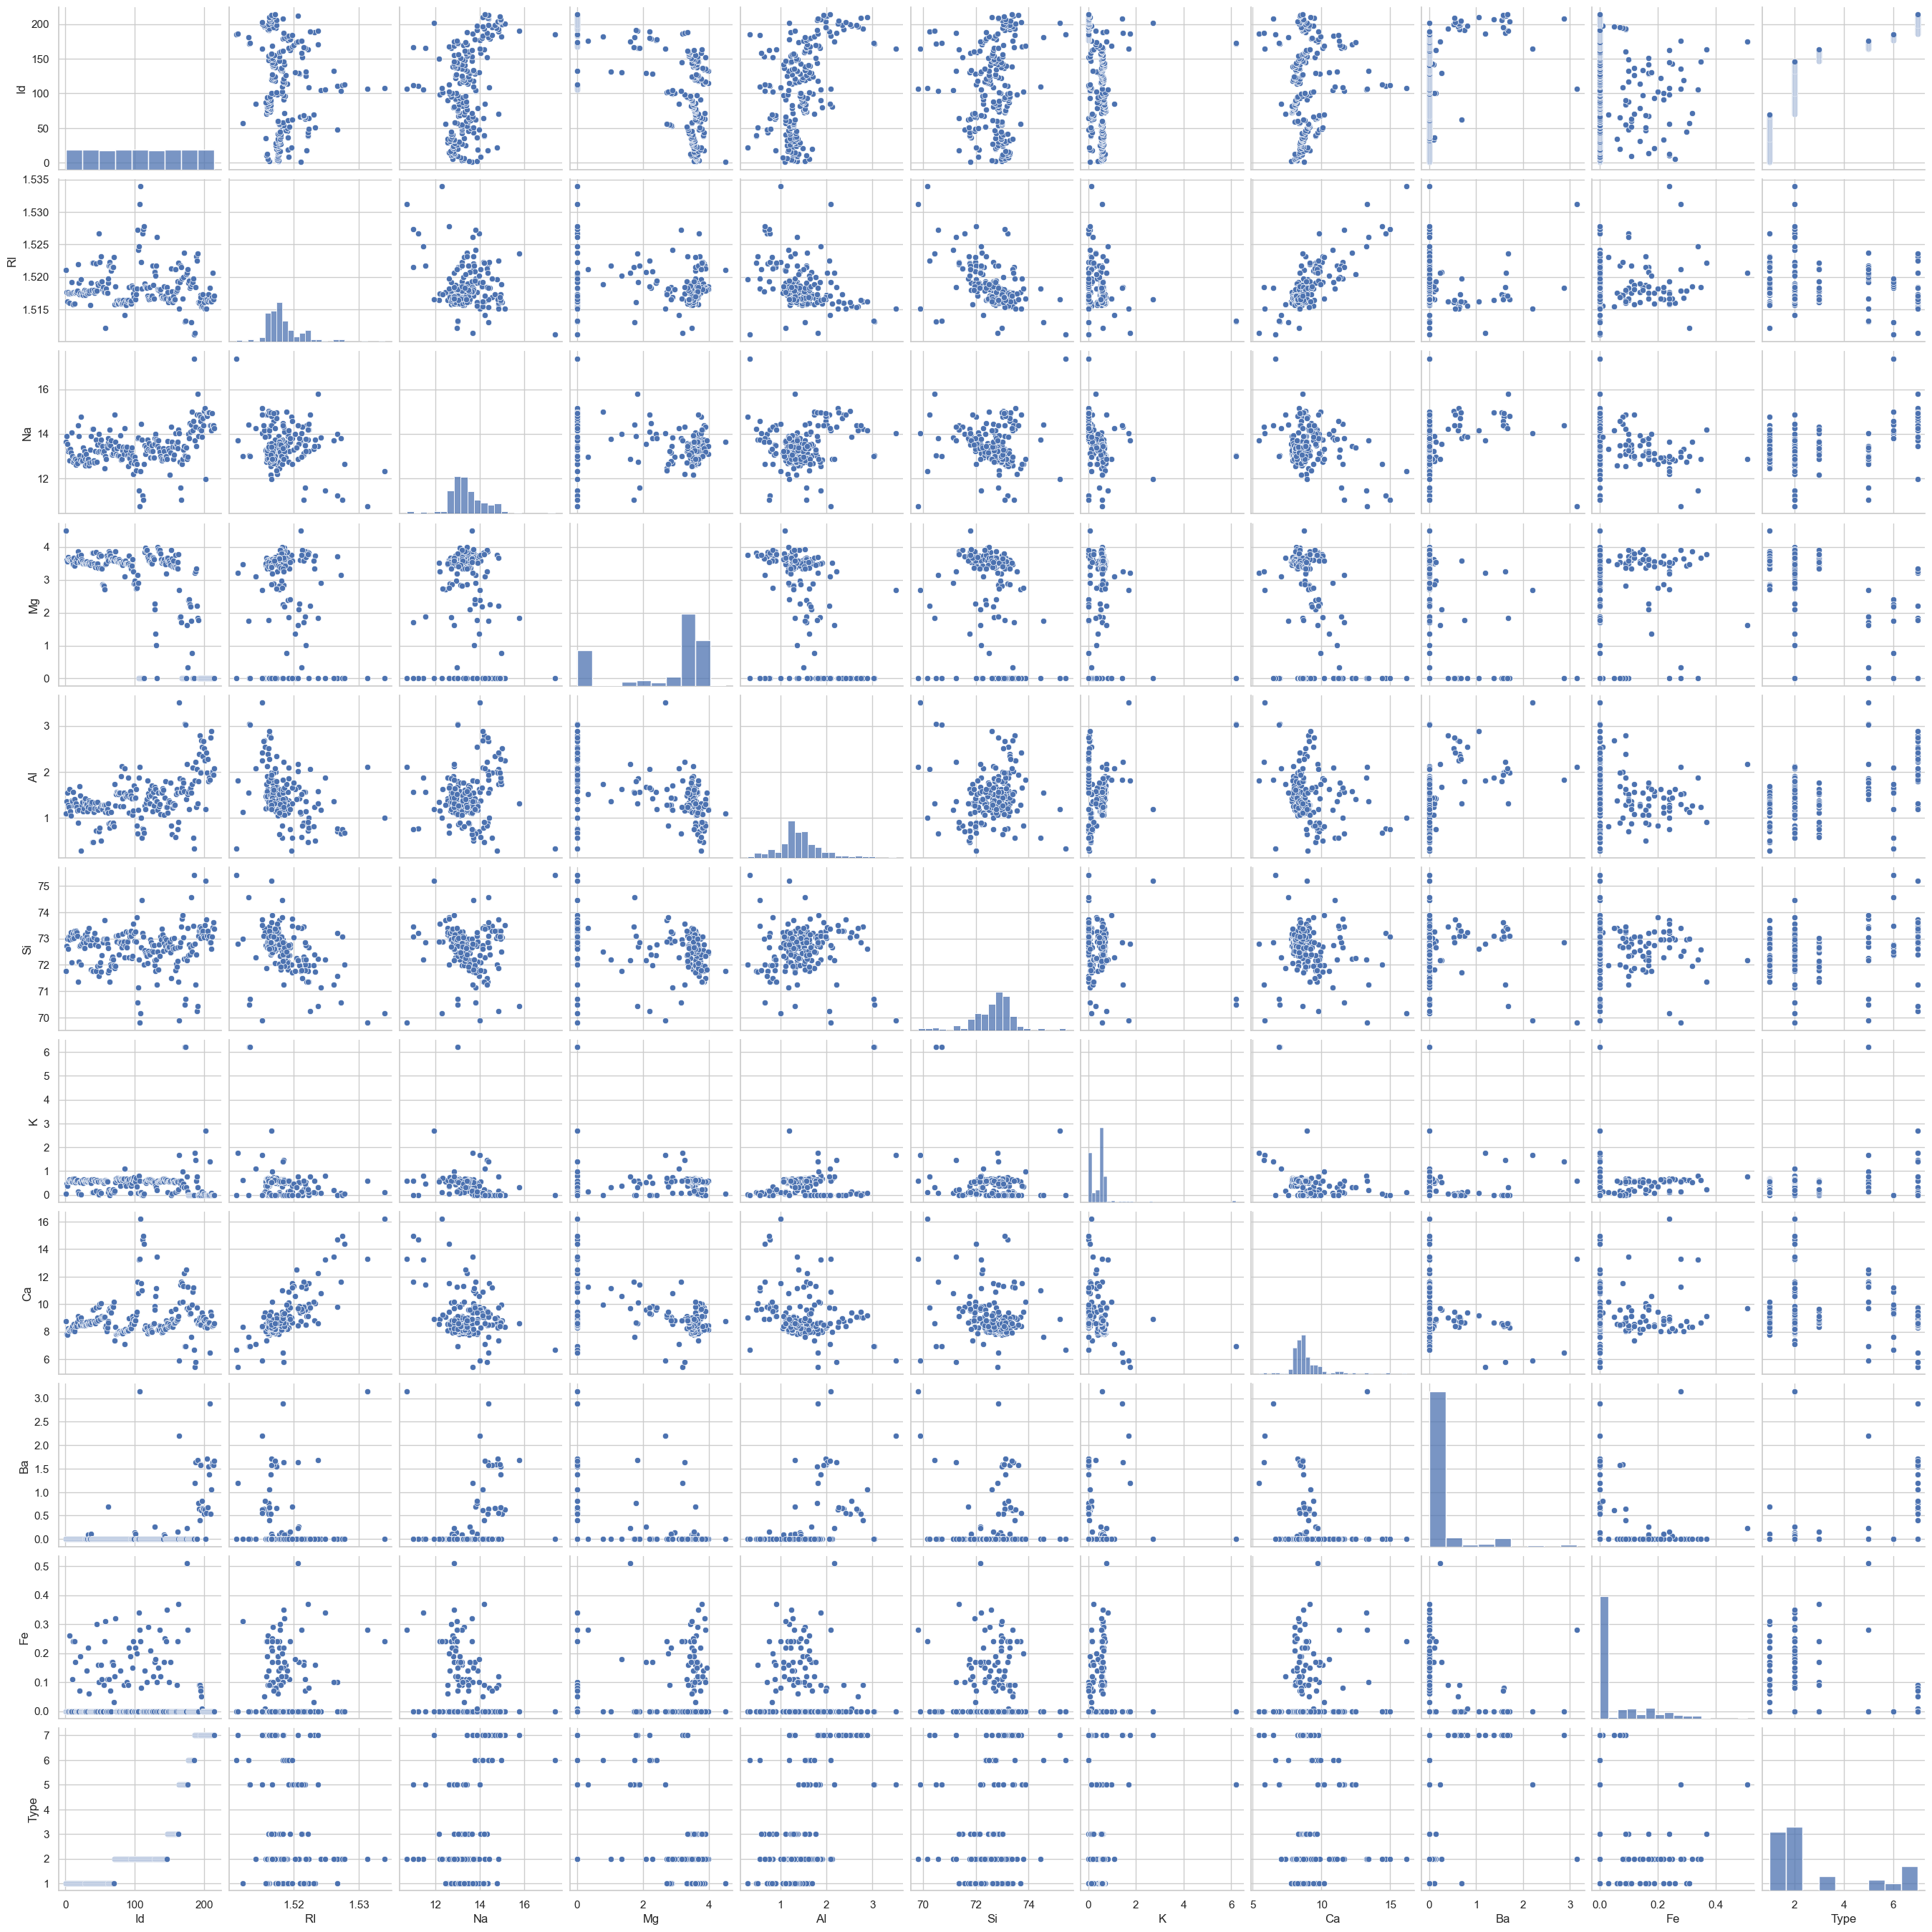

In [25]:
sns.pairplot(gdf)

<AxesSubplot:>

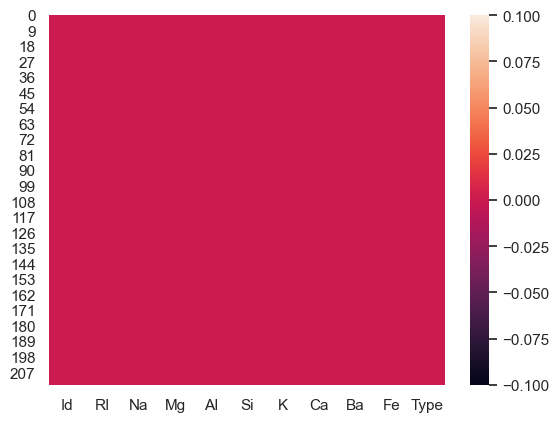

In [27]:
sns.heatmap(gdf.isnull())

In [28]:
gdf.skew()

Id      0.000000
RI      1.625431
Na      0.454181
Mg     -1.152559
AI      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

<AxesSubplot:ylabel='Frequency'>

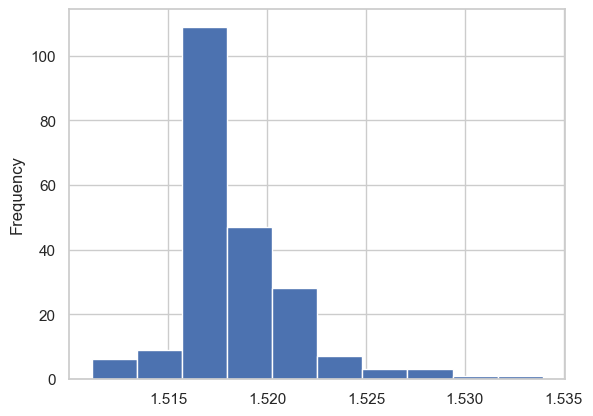

In [29]:
gdf['RI'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

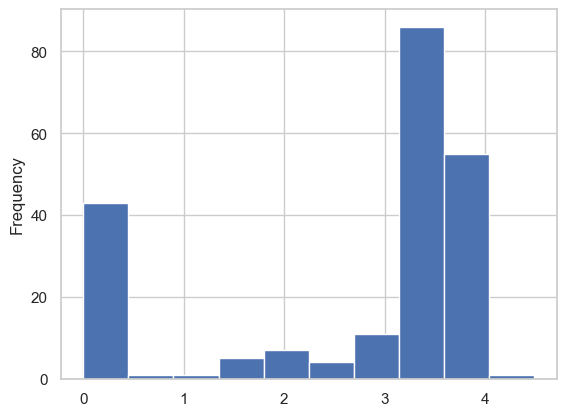

In [30]:
gdf['Mg'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

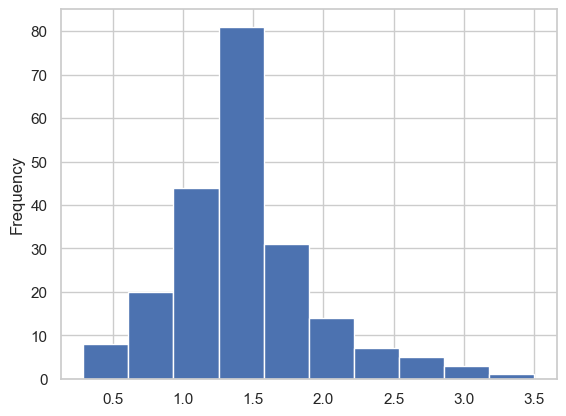

In [31]:
gdf['AI'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

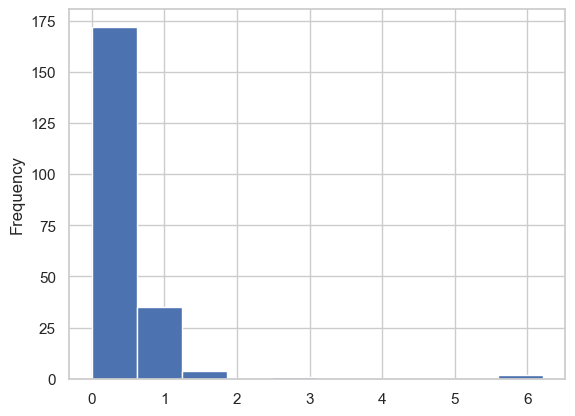

In [32]:
gdf['K'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

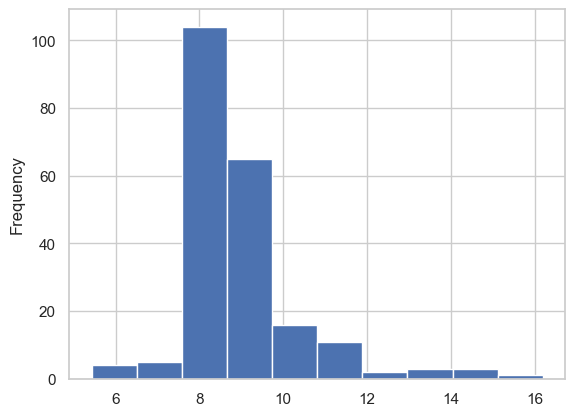

In [33]:
gdf['Ca'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

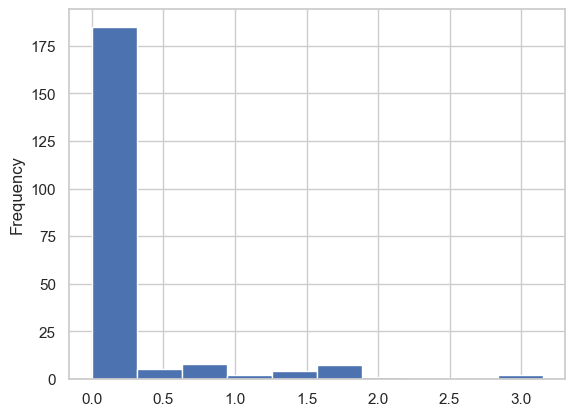

In [34]:
gdf['Ba'].plot.hist()

In [35]:
gdf.count()

Id      214
RI      214
Na      214
Mg      214
AI      214
Si      214
K       214
Ca      214
Ba      214
Fe      214
Type    214
dtype: int64

In [36]:
gdf['RI'].unique()

array([1.52101, 1.51761, 1.51618, 1.51766, 1.51742, 1.51596, 1.51743,
       1.51756, 1.51918, 1.51755, 1.51571, 1.51763, 1.51589, 1.51748,
       1.51784, 1.52196, 1.51911, 1.51735, 1.5175 , 1.51966, 1.51736,
       1.51751, 1.5172 , 1.51764, 1.51793, 1.51721, 1.51768, 1.51747,
       1.51775, 1.51753, 1.51783, 1.51567, 1.51909, 1.51797, 1.52213,
       1.51779, 1.5221 , 1.51786, 1.519  , 1.51869, 1.52667, 1.52223,
       1.51898, 1.5232 , 1.51926, 1.51808, 1.51837, 1.51778, 1.51769,
       1.51215, 1.51824, 1.51754, 1.51905, 1.51977, 1.52172, 1.52227,
       1.52099, 1.52152, 1.523  , 1.51574, 1.51848, 1.51593, 1.51631,
       1.5159 , 1.51645, 1.51627, 1.51613, 1.51592, 1.51646, 1.51594,
       1.51409, 1.51625, 1.51569, 1.5164 , 1.51841, 1.51605, 1.51588,
       1.51629, 1.5186 , 1.51689, 1.51811, 1.51655, 1.5173 , 1.5182 ,
       1.52725, 1.5241 , 1.52475, 1.53125, 1.53393, 1.52222, 1.51818,
       1.52664, 1.52739, 1.52777, 1.51892, 1.51847, 1.51846, 1.51829,
       1.51708, 1.51

In [38]:
gdf['RI'].nunique()

178

In [39]:
gdf['Na'].nunique()

142

In [41]:
gdf['Mg'].nunique()

94

In [42]:
gdf['AI'].nunique()

118

In [43]:
gdf['Si'].nunique()

133

In [44]:
gdf['K'].nunique()

65

In [45]:
gdf['Ca'].nunique()

143

In [46]:
gdf['Ba'].nunique()

34

In [47]:
gdf['Fe'].nunique()

32

In [48]:
gdf['Type'].nunique()

6

In [50]:
gdf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

Id         AxesSubplot(0.125,0.53;0.110714x0.35)
RI      AxesSubplot(0.257857,0.53;0.110714x0.35)
Na      AxesSubplot(0.390714,0.53;0.110714x0.35)
Mg      AxesSubplot(0.523571,0.53;0.110714x0.35)
AI      AxesSubplot(0.656429,0.53;0.110714x0.35)
Si      AxesSubplot(0.789286,0.53;0.110714x0.35)
K          AxesSubplot(0.125,0.11;0.110714x0.35)
Ca      AxesSubplot(0.257857,0.11;0.110714x0.35)
Ba      AxesSubplot(0.390714,0.11;0.110714x0.35)
Fe      AxesSubplot(0.523571,0.11;0.110714x0.35)
Type    AxesSubplot(0.656429,0.11;0.110714x0.35)
dtype: object

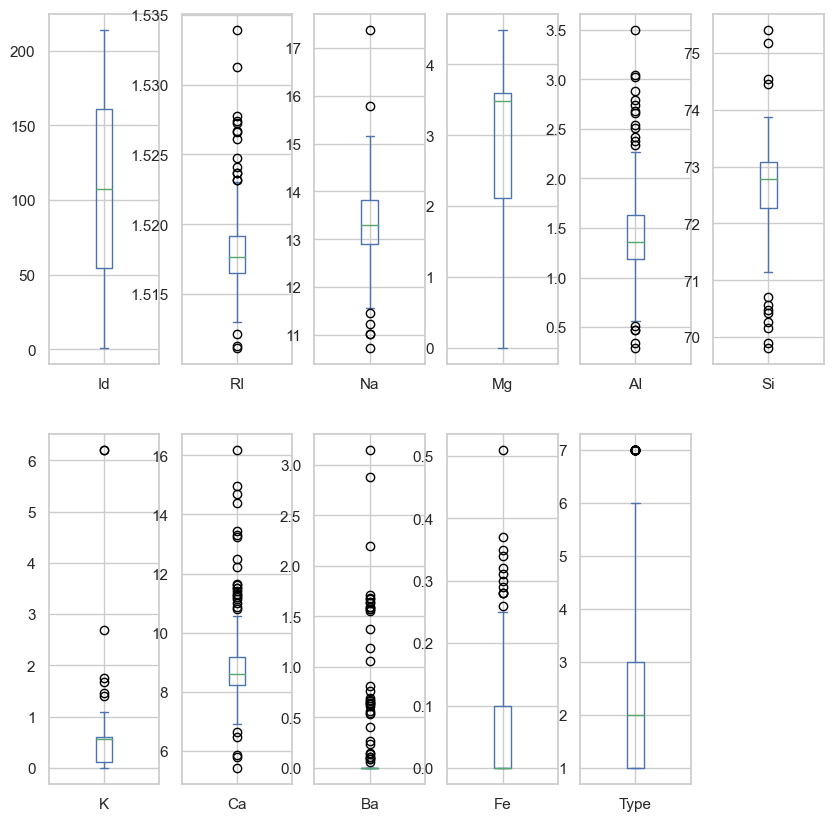

In [53]:
gdf.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [42]:
z=np.abs(zscore(gdf))
z

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1.723976,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,1.707788,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,1.691601,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,1.675413,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,1.659226,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...,...
209,1.659226,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,1.675413,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,1.691601,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,1.707788,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [43]:
threshold=3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([7, 1, 2, 5, 7, 8, 1, 5, 7, 7, 7, 1, 7, 7, 9, 9, 4, 5, 8, 4, 6, 4,
       6, 9, 2, 5, 5, 8, 5, 6, 8, 8, 8], dtype=int64))


In [44]:
gdf.shape

(214, 11)

In [45]:
gdf_new=gdf[(z<3).all(axis=1)]

In [46]:
gdf_new.shape

(194, 11)

In [47]:
gdf_new.describe()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,102.221649,1.518062,13.416959,2.880000,1.422732,72.720619,0.431546,8.824639,0.123351,0.051598,2.618557
std,61.530795,0.002288,0.673292,1.308715,0.443786,0.584852,0.282287,0.989154,0.357125,0.085782,2.030561
min,1.000000,1.511310,11.030000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.250000,1.516513,12.945000,2.855000,1.190000,72.372500,0.132500,8.240000,0.000000,0.000000,1.000000
50%,97.500000,1.517635,13.305000,3.500000,1.360000,72.820000,0.555000,8.585000,0.000000,0.000000,2.000000
75%,153.750000,1.518995,13.787500,3.610000,1.602500,73.087500,0.600000,9.077500,0.000000,0.090000,3.000000
max,213.000000,1.527250,15.150000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


<AxesSubplot:>

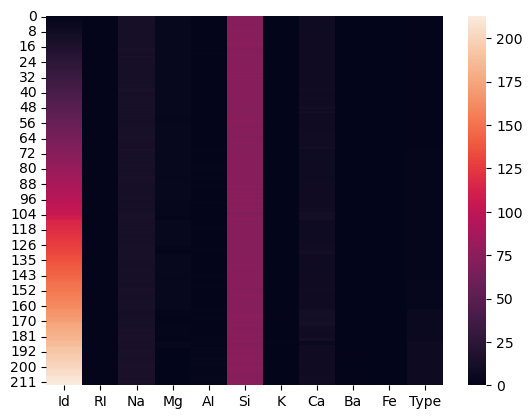

In [59]:
sns.heatmap(gdf_new)

In [48]:
gdf_new.corr()

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
Id,1.000000,-0.100672,0.412167,-0.666870,0.530711,0.150453,-0.301012,0.193161,0.512633,-0.109030,0.872504
RI,-0.100672,1.000000,0.050760,0.048147,-0.522197,-0.609011,-0.368238,0.690650,-0.193013,-0.020046,-0.167355
Na,0.412167,0.050760,1.000000,-0.487729,0.253127,-0.234718,-0.612183,0.019987,0.532000,-0.209838,0.533025
Mg,-0.666870,0.048147,-0.487729,1.000000,-0.593457,-0.377464,0.482622,-0.455582,-0.586581,0.134065,-0.810321
AI,0.530711,-0.522197,0.253127,-0.593457,1.000000,0.335262,0.005827,-0.213304,0.532061,-0.117764,0.660262
Si,0.150453,-0.609011,-0.234718,-0.377464,0.335262,1.000000,0.072579,-0.165712,0.155017,0.023279,0.262152
K,-0.301012,-0.368238,-0.612183,0.482622,0.005827,0.072579,1.000000,-0.500579,-0.253790,0.099394,-0.383499
Ca,0.193161,0.690650,0.019987,-0.455582,-0.213304,-0.165712,-0.500579,1.000000,-0.167843,-0.011635,0.154762
Ba,0.512633,-0.193013,0.532000,-0.586581,0.532061,0.155017,-0.253790,-0.167843,1.000000,-0.119955,0.682768
Fe,-0.109030,-0.020046,-0.209838,0.134065,-0.117764,0.023279,0.099394,-0.011635,-0.119955,1.000000,-0.202028


In [49]:
x=gdf_new.iloc[:,0:10]

In [50]:
x

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [51]:
y=gdf_new.iloc[:,10:11]

In [52]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
208,7
209,7
210,7
211,7


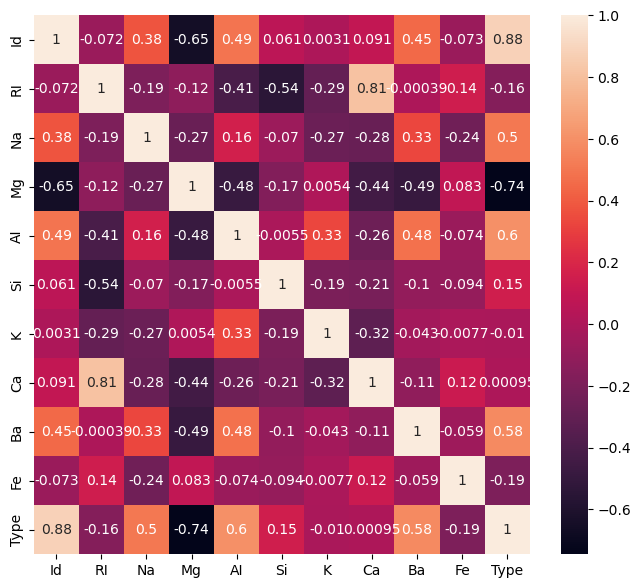

In [53]:
corr_hmap=gdf.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=45)

In [55]:
x.shape

(194, 10)

In [56]:
y.shape

(194, 1)

In [39]:
enr=ElasticNet(alpha=0.0001)
enr.fit(train_x,train_y)
enrpred=enr.predict(test_y)
print(enr.score(train_x,train_y))
enr.coef_

ValueError: X has 1 features, but ElasticNet is expecting 10 features as input.

In [ ]:
i do not know how to deal with the above error

In [17]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.64931305,  1.29178128,  0.33212692, ..., -0.07565285,
        -0.34629211, -0.60305615],
       [-1.63301898, -0.19783224,  0.70439768, ..., -1.00814732,
        -0.34629211, -0.60305615],
       [-1.61672491, -0.82434616,  0.16832779, ..., -1.05882637,
        -0.34629211, -0.60305615],
       ...,
       [ 1.7724425 , -0.53080467,  2.23815319, ..., -0.43040618,
         4.11744651, -0.60305615],
       [ 1.78873657,  1.13405749,  1.4042667 , ..., -0.38986294,
         4.25781564, -0.60305615],
       [ 1.80503065, -0.67976602,  1.43404836, ..., -0.3493197 ,
         4.06129885, -0.60305615]])

In [18]:
x

array([[-1.64931305,  1.29178128,  0.33212692, ..., -0.07565285,
        -0.34629211, -0.60305615],
       [-1.63301898, -0.19783224,  0.70439768, ..., -1.00814732,
        -0.34629211, -0.60305615],
       [-1.61672491, -0.82434616,  0.16832779, ..., -1.05882637,
        -0.34629211, -0.60305615],
       ...,
       [ 1.7724425 , -0.53080467,  2.23815319, ..., -0.43040618,
         4.11744651, -0.60305615],
       [ 1.78873657,  1.13405749,  1.4042667 , ..., -0.38986294,
         4.25781564, -0.60305615],
       [ 1.80503065, -0.67976602,  1.43404836, ..., -0.3493197 ,
         4.06129885, -0.60305615]])

In [35]:
gdf1=pd.DataFrame(gdf=gdf)
gdf1

TypeError: __init__() got an unexpected keyword argument 'gdf'

In [36]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [37]:
cal_vif(x)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
could not do multicollinearity due to the above error
please guide me into this

In [24]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.8135593220338984
[[18  3  0  0  0  0]
 [ 0 17  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  1  1  1]
 [ 0  0  2  0  1  9]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        21
           2       0.85      0.94      0.89        18
           3       0.38      1.00      0.55         3
           5       0.00      0.00      0.00         1
           6       0.50      0.25      0.33         4
           7       0.90      0.75      0.82        12

    accuracy                           0.81        59
   macro avg       0.60      0.63      0.59        59
weighted avg       0.85      0.81      0.82        59



In [25]:
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79487179 1.         1.         0.97435897 0.23684211]
0.8012145748987853
0.2924266707640939


In [27]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.864406779661017
[[21  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  1  0  0  3]
 [ 0  0  0  0  0 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.82      1.00      0.90        18
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.80      1.00      0.89        12

    accuracy                           0.86        59
   macro avg       0.44      0.50      0.46        59
weighted avg       0.77      0.86      0.81        59



In [28]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.64102564 0.84615385 0.84615385 0.82051282 0.55263158]
0.7412955465587046
0.1215845788833034


In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.9491525423728814
[[21  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  3  0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86        12

    accuracy                           0.95        59
   macro avg       0.92      0.96      0.92        59
weighted avg       0.97      0.95      0.95        59



In [32]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.74358974 1.         1.         1.         0.60526316]
0.8697705802968961
0.16538735461127185


In [60]:
knn=KNeighborsClassifier()
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn=dtc.predict(test_x)
print(accuracy_score(test_x,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [61]:
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71794872 1.         1.         1.         0.60526316]
0.864642375168691
0.1695651303907382


In [68]:
gdf1=pd.DataFrame(data=gdf_new)
gdf1

,Id,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
208,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [69]:
x=gdf1.data
y=gdf1.target

AttributeError: 'DataFrame' object has no attribute 'data'

In [70]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(gdf1.data,gdf1.target)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
hyperparameter not working please guide

In [72]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
pred=mnb.predict(test_x)
print(accuracy_score(test_y,pred))
round(accuracy_score(test_y,pred),2)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8135593220338984
[[18  3  0  0  0  0]
 [ 0 17  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  1  1  1]
 [ 0  0  2  0  1  9]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        21
           2       0.85      0.94      0.89        18
           3       0.38      1.00      0.55         3
           5       0.00      0.00      0.00         1
           6       0.50      0.25      0.33         4
           7       0.90      0.75      0.82        12

    accuracy                           0.81        59
   macro avg       0.60      0.63      0.59        59
weighted avg       0.85      0.81      0.82        59



In [76]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
prd=gnb.predict(test_x)
accuracy_score(test_y,prd)
confusion_matrix(test_y,prd)
print(classification_report(test_y,prd))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.78      1.00      0.88        18
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         4
           7       1.00      0.83      0.91        12

    accuracy                           0.92        59
   macro avg       0.96      0.88      0.90        59
weighted avg       0.93      0.92      0.91        59



In [77]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
prd=knn.predict(test_x)
accuracy_score(test_y,prd)
print(confusion_matrix(test_y,prd))
print(classification_report(test_y,pred))

[[21  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  2 10]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        21
           2       0.85      0.94      0.89        18
           3       0.38      1.00      0.55         3
           5       0.00      0.00      0.00         1
           6       0.50      0.25      0.33         4
           7       0.90      0.75      0.82        12

    accuracy                           0.81        59
   macro avg       0.60      0.63      0.59        59
weighted avg       0.85      0.81      0.82        59



In [78]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(train_x,train_y)
dtc.predict(test_y)
preddtc=dtc.predict(test_x)
accuracy_score(test_y,preddtc)
confusion_matrix(test_y,preddtc)
print(classification_report(test_y,preddtc))

ValueError: X has 1 features, but DecisionTreeClassifier is expecting 10 features as input.

In [ ]:
decision tree classifier not working

In [81]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
predsvc=svc.predict(test_x)
accuracy_score(test_y,predsvc)
confusion_matrix(test_y,predsvc)
print(classification_report(test_y,predsvc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       0.82      1.00      0.90        18
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.80      1.00      0.89        12

    accuracy                           0.86        59
   macro avg       0.44      0.50      0.46        59
weighted avg       0.77      0.86      0.81        59



In [84]:
Type=int(input('Enter any type'))

if (Type==1):
    print('building_windows_float_processed')
elif(Type==2):
    print('building_windows_non_float_processed')
elif(Type==3):
    print('vehicle_windows_float_processed')
elif(Type==4):
    print('vehicle_windows_non_float_processed (none in this database)')
elif(Type==5):
    print('containers')
elif(Type==6):
    print('tableware')
elif(Type==7):
    print('headlamps')

Enter any type7
headlamps
